In [1]:
import pandas as pd
import numpy as np

<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science </h1>

## Lecture 3: Introduction to Pandas

**Harvard University**<br/>
**Fall 2025**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader</br>
**Preceptor**: Chris Gumb


<hr style='height:2px'>

### Outline
In this class we'll get familiar with the two Pandas data structures, the `Series` and the `DataFrame`, and the various methods for manipulating the data they contain.

We'll start by simply understanding the data structure objects themselves, constructing them from more familiar Python data structures like lists and dictionaries. We'll then motivate subsequent examples by asking questions about the [student survey](https://forms.gle/zZ487CpYfPstrDui7) data which we'll load into a DataFrame from a CSV.

A very simple markdown scaffold exists with some guiding questions, but students are encouraged to ask questions about how to accomplish different goals with Pandas. All code will be written on the spot (🤞), but you'll have access to a completed notebook on Ed under "solutions" if you want to peek.

### Resources
- There is additional Pandas material in the [Bedrock Data Science](https://edstem.org/us/courses/83082/lessons/147401/slides/851872) and [Bedrock Codecasts & Tutorials](https://edstem.org/us/courses/83082/lessons/147410/slides/851967)sections on Ed
- Pandas has their own quick start guide, [Pandas in 10 Minutes](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) (though that seems like a gross underestimate)
- Make friends with the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
  
### Pandas Data Structures

#### Series
You can think of a Series as a kind of wrapper for a numpy array which provides some helpful attributes and methods.
- Constructing a Series from Python lists.
- Demonstrate attributes like `values`, `index`, `name`, `dtype`.
- Some basic methods like `head()`, `tail()`, `describe()`.

In [2]:
l = ['a', 'b', 'c']
pd.Series(l, index=[5,3,1])

5    a
3    b
1    c
dtype: object

In [3]:
l = [np.pi, np.e]
pd.Series(l)

0    3.141593
1    2.718282
dtype: float64

In [4]:
l = [-3, -2, -1]
series = pd.Series(l, name='ints!', dtype=str)
series

0    -3
1    -2
2    -1
Name: ints!, dtype: object

In [5]:
series.values

array(['-3', '-2', '-1'], dtype=object)

In [6]:
series.index

RangeIndex(start=0, stop=3, step=1)

In [7]:
series.index = ['foo', 'bar', 'foo']
series

foo    -3
bar    -2
foo    -1
Name: ints!, dtype: object

In [8]:
series.dtype

dtype('O')

In [9]:
type(series.values)

numpy.ndarray

#### DataFrame
- How to construct from Python lists, dictionaries, and Series.
- Attributes like `shape`, `columns`, `index`, `values`.
- Methods like `head()`, `tail()`, `info()`, `describe()`.
- Combining DataFrames with `pd.concatenate()` and `pd.merge()`

A DataFrame is basically just a bunch of Series objects bound together by common indices.

A common way to built a DataFrame is to use a list of dictionaries. Each dictionary is a row and the key-value pairs designate which value appears in which Series (column). For example:

In [10]:
l = [{'fruit': 'apple', 'color': 'red'},
     {'fruit': 'grape', 'color': 'purple'}]
pd.DataFrame(l)

,fruit,color
0,apple,red
1,grape,purple


In [11]:
data = np.random.multivariate_normal(mean=[0,-1], cov=[[1,0.5],[0.5,1]], size=100)
pd.DataFrame(data=data, columns=["X", "Y"])

,X,Y
0,-1.558152,-1.781442
1,-0.114449,-2.243731
2,-1.675996,-2.528247
3,0.308387,-1.627142
4,-1.138339,-1.671097
...,...,...
95,-0.472583,-1.279945
96,0.837219,-1.368616
97,0.138046,-0.813802
98,-0.210365,-2.146889


### Data Loading and Inspection
- Use `pd.read_csv()` to load data.
- Initial inspection using `shape`, `head()`, `tail()`, `columns`, `dtypes`, and `describe()`.

Read the survey CSV into a Pandas DataFrame

In [12]:
df = pd.read_csv("data/cs1090a_survey_raw.csv")

Take a quick look at a few rows.

In [13]:
df.head()

,Timestamp,What's your Harvard affiliation?\n,Have you used Jupyter Notebooks before?,How many years of Python programming experience do you have?\n(Choose the range that best fits your experience.),Rate your current Pandas skill level.,What is your primary OS?,Do use normally code/browse in dark mode?,"What languages do you speak? \n(Comma separated)\n\nExample: Hittite, Elvish, Cornish, Klingon",Which continents have you visited?,When were you born?,What time do you usually wake up in the morning?,What time do you usually go to bed?,Favorite Season?,Where do you usually get your caffeine?,Which kind of pet do you prefer?,What's your favorite movie?,What movie genres do particularly enjoy?\n(select as many as you like),"List up to 3 of your hobbies.\n(comma separated)\n\nExample: playing kazoo, bird watching, stamp collecting",How was HW0?
0,9/9/2025 17:43:09,Bachelor's (CS),Yes,Less than 1 year,2,MacOS,No,English,"Africa, Asia, Europe, North America, South Ame...",11/15/2004,10:00:00 AM,12:00:00 AM,Spring,Tea,Pet rock,NaN,Comedy,"tennis, movies, eating",NaN
1,9/9/2025 17:44:15,Bachelor's (Statistics),Yes,1-2 years,1,MacOS,Yes,English,North America,10/21/2004,9:00:00 AM,1:00:00 AM,Fall,Coffee,Pet cat,NaN,"Action, Comedy, Sci-Fi, Mystery/Thriller",NaN,NaN
2,9/9/2025 17:44:16,Master's (DS),Yes,4+ years,5,MacOS,Yes,NaN,"Asia, Australia, Europe, North America",2/22/2003,11:00:00 AM,1:00:00 AM,Winter,Coffee,Pet cat,NaN,NaN,NaN,NaN
3,9/9/2025 17:44:32,Bachelor's (AM),Yes,2-4 years,4,MacOS,Yes,English,"Europe, North America, South America",9/23/2004,7:25:00 AM,12:00:00 AM,Summer,No caffeine for me!,Pet cat,Shawshank Redemption,"Action, Comedy, Sci-Fi","hiking, running, reading",NaN
4,9/9/2025 17:44:38,Bachelor's (Chemistry),Yes,1-2 years,4,MacOS,Yes,"English, Spanish",North America,6/14/2004,8:45:00 AM,12:00:00 AM,Winter,No caffeine for me!,Pet cat,Bee Movie,"Sci-Fi, Fantasy","playing cello, basketball, playing minecraft",NaN


How many rows and columns are there?

In [14]:
df.shape

(175, 19)

What are all the columns?

In [15]:
list(df.columns)

['Timestamp',
 "What's your Harvard affiliation?\n",
 'Have you used Jupyter Notebooks before?',
 'How many years of Python programming experience do you have?\n(Choose the range that best fits your experience.)',
 'Rate your current Pandas skill level.',
 'What is your primary OS?',
 'Do use normally code/browse in dark mode?',
 'What languages do you speak? \n(Comma separated)\n\nExample: Hittite, Elvish, Cornish, Klingon',
 'Which continents have you visited?',
 'When were you born?',
 'What time do you usually wake up in the morning?',
 'What time do you usually go to bed?',
 'Favorite Season?',
 'Where do you usually get your caffeine?',
 'Which kind of pet do you prefer?',
 "What's your favorite movie?",
 'What movie genres do particularly enjoy?\n(select as many as you like)',
 'List up to 3 of your hobbies.\n(comma separated)\n\nExample: playing kazoo, bird watching, stamp collecting',
 'How was HW0?']

Can we get any summary statistics from the columns?

In [16]:
df.describe()

,Rate your current Pandas skill level.
count,175.000000
mean,2.531429
std,1.133546
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


What are the in data types of each columns?

In [17]:
df.dtypes

Timestamp                                                                                                           object
What's your Harvard affiliation?\n                                                                                  object
Have you used Jupyter Notebooks before?                                                                             object
How many years of Python programming experience do you have?\n(Choose the range that best fits your experience.)    object
Rate your current Pandas skill level.                                                                                int64
What is your primary OS?                                                                                            object
Do use normally code/browse in dark mode?                                                                           object
What languages do you speak? \n(Comma separated)\n\nExample: Hittite, Elvish, Cornish, Klingon                      object
Which continents

### Data Cleaning

#### Do we need all of the columns? Are the column names useable? Do we need to change data types? Do we have missing values?

- `drop` (for rows or columns)
- `apply` arbitrary functions applied to a column(s)
- `astype` to convert column dtype
- `str` methods on columns
- `info()` and `isna` for missing values.
- Discuss `NaN` and methods like `fillna()`, `dropna()`.

The column names are too long to be practical. We should rename them.

In [18]:
# snip keep
cols = [
    "timestamp","program","jupyter","python_exp","pandas_skill","os","dark_mode",
    "languages","continents","dob","wake_time","sleep_time","fav_season",
    "caffeine","pet","fav_movie","fav_genres","hobbies","hw0"
]

In [19]:
df.columns = cols
df.head()

,timestamp,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0
0,9/9/2025 17:43:09,Bachelor's (CS),Yes,Less than 1 year,2,MacOS,No,English,"Africa, Asia, Europe, North America, South Ame...",11/15/2004,10:00:00 AM,12:00:00 AM,Spring,Tea,Pet rock,NaN,Comedy,"tennis, movies, eating",NaN
1,9/9/2025 17:44:15,Bachelor's (Statistics),Yes,1-2 years,1,MacOS,Yes,English,North America,10/21/2004,9:00:00 AM,1:00:00 AM,Fall,Coffee,Pet cat,NaN,"Action, Comedy, Sci-Fi, Mystery/Thriller",NaN,NaN
2,9/9/2025 17:44:16,Master's (DS),Yes,4+ years,5,MacOS,Yes,NaN,"Asia, Australia, Europe, North America",2/22/2003,11:00:00 AM,1:00:00 AM,Winter,Coffee,Pet cat,NaN,NaN,NaN,NaN
3,9/9/2025 17:44:32,Bachelor's (AM),Yes,2-4 years,4,MacOS,Yes,English,"Europe, North America, South America",9/23/2004,7:25:00 AM,12:00:00 AM,Summer,No caffeine for me!,Pet cat,Shawshank Redemption,"Action, Comedy, Sci-Fi","hiking, running, reading",NaN
4,9/9/2025 17:44:38,Bachelor's (Chemistry),Yes,1-2 years,4,MacOS,Yes,"English, Spanish",North America,6/14/2004,8:45:00 AM,12:00:00 AM,Winter,No caffeine for me!,Pet cat,Bee Movie,"Sci-Fi, Fantasy","playing cello, basketball, playing minecraft",NaN


We won't use the timestamp, so **we should drop it**.

In [20]:
df = df.drop("timestamp", axis=1)
df.head()

,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0
0,Bachelor's (CS),Yes,Less than 1 year,2,MacOS,No,English,"Africa, Asia, Europe, North America, South Ame...",11/15/2004,10:00:00 AM,12:00:00 AM,Spring,Tea,Pet rock,NaN,Comedy,"tennis, movies, eating",NaN
1,Bachelor's (Statistics),Yes,1-2 years,1,MacOS,Yes,English,North America,10/21/2004,9:00:00 AM,1:00:00 AM,Fall,Coffee,Pet cat,NaN,"Action, Comedy, Sci-Fi, Mystery/Thriller",NaN,NaN
2,Master's (DS),Yes,4+ years,5,MacOS,Yes,NaN,"Asia, Australia, Europe, North America",2/22/2003,11:00:00 AM,1:00:00 AM,Winter,Coffee,Pet cat,NaN,NaN,NaN,NaN
3,Bachelor's (AM),Yes,2-4 years,4,MacOS,Yes,English,"Europe, North America, South America",9/23/2004,7:25:00 AM,12:00:00 AM,Summer,No caffeine for me!,Pet cat,Shawshank Redemption,"Action, Comedy, Sci-Fi","hiking, running, reading",NaN
4,Bachelor's (Chemistry),Yes,1-2 years,4,MacOS,Yes,"English, Spanish",North America,6/14/2004,8:45:00 AM,12:00:00 AM,Winter,No caffeine for me!,Pet cat,Bee Movie,"Sci-Fi, Fantasy","playing cello, basketball, playing minecraft",NaN


`dark_mode` is a boolean (True/False) variable. Making the dtype reflect this will save time later.

In [21]:
df['dark_mode'] = df.dark_mode == 'Yes'
df.dark_mode.dtype

dtype('bool')

Converting categorical variables like `os` to the `category` dtype can have many advantages. In large datasets this can mean increased speed and memory efficiency. It can also enforce that a variable only take on a perscribed set of values.

In [22]:
df['os'] = df.os.astype('category')
df.os

0        MacOS
1        MacOS
2        MacOS
3        MacOS
4        MacOS
        ...   
170      MacOS
171    Windows
172      MacOS
173      MacOS
174    Windows
Name: os, Length: 175, dtype: category
Categories (6, object): ['I use Google colab', 'Linux', 'MacOS', 'Use WSL at work, macOS at home so I suppose a..., 'Windows', 'wsl']

The `category` dtype is also useful to impose an odering on variables that are not strictly numeric. We call such variables "ordinal."

This is the case for the `python_exp` variable. Let's convert that column now and specify a sensible order with the help of `pandas.api.types.CategoricalDtype`.

In [23]:
df.python_exp.unique()

array(['Less than 1 year', '1-2 years', '4+ years', '2-4 years'],
      dtype=object)

In [24]:
from pandas.api.types import CategoricalDtype

In [25]:
# snip
experience_order = pd.CategoricalDtype(categories=['Less than 1 year', '1-2 years', '2-4 years', '4+ years'], ordered=True)
df['python_experience'] = df.python_exp.astype(experience_order)
df.python_exp

0      Less than 1 year
1             1-2 years
2              4+ years
3             2-4 years
4             1-2 years
             ...       
170            4+ years
171           1-2 years
172    Less than 1 year
173            4+ years
174           2-4 years
Name: python_exp, Length: 175, dtype: object

**Text Normalization**

For columns whose values were manually typed by the user, upper- and lowercase may not have been use constentily across all entries. For this reason it is usually advised to convert all string columns to lowercase.

In [26]:
# snip
# Here's one way to do this
str_cols = df.columns[df.dtypes == 'object']
for c in str_cols:
    df[c] = df[c].str.lower()
df.head()

,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0,python_experience
0,bachelor's (cs),yes,less than 1 year,2,MacOS,False,english,"africa, asia, europe, north america, south ame...",11/15/2004,10:00:00 am,12:00:00 am,spring,tea,pet rock,NaN,comedy,"tennis, movies, eating",NaN,Less than 1 year
1,bachelor's (statistics),yes,1-2 years,1,MacOS,True,english,north america,10/21/2004,9:00:00 am,1:00:00 am,fall,coffee,pet cat,NaN,"action, comedy, sci-fi, mystery/thriller",NaN,NaN,1-2 years
2,master's (ds),yes,4+ years,5,MacOS,True,NaN,"asia, australia, europe, north america",2/22/2003,11:00:00 am,1:00:00 am,winter,coffee,pet cat,NaN,NaN,NaN,NaN,4+ years
3,bachelor's (am),yes,2-4 years,4,MacOS,True,english,"europe, north america, south america",9/23/2004,7:25:00 am,12:00:00 am,summer,no caffeine for me!,pet cat,shawshank redemption,"action, comedy, sci-fi","hiking, running, reading",NaN,2-4 years
4,bachelor's (chemistry),yes,1-2 years,4,MacOS,True,"english, spanish",north america,6/14/2004,8:45:00 am,12:00:00 am,winter,no caffeine for me!,pet cat,bee movie,"sci-fi, fantasy","playing cello, basketball, playing minecraft",NaN,1-2 years


Do we have any **duplicate rows**?

In [27]:
df.duplicated().sum()

np.int64(0)

Do any columns have **missing values**?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   program            173 non-null    object  
 1   jupyter            175 non-null    object  
 2   python_exp         175 non-null    object  
 3   pandas_skill       175 non-null    int64   
 4   os                 175 non-null    category
 5   dark_mode          175 non-null    bool    
 6   languages          172 non-null    object  
 7   continents         174 non-null    object  
 8   dob                165 non-null    object  
 9   wake_time          167 non-null    object  
 10  sleep_time         169 non-null    object  
 11  fav_season         172 non-null    object  
 12  caffeine           173 non-null    object  
 13  pet                171 non-null    object  
 14  fav_movie          138 non-null    object  
 15  fav_genres         162 non-null    object  
 16  hobbies 

How many are missing in each?

In [29]:
df.isna().sum()

program                2
jupyter                0
python_exp             0
pandas_skill           0
os                     0
dark_mode              0
languages              3
continents             1
dob                   10
wake_time              8
sleep_time             6
fav_season             3
caffeine               2
pet                    4
fav_movie             37
fav_genres            13
hobbies               24
hw0                  162
python_experience      0
dtype: int64

Let's inspect the rows with more than a single missing value.

In [30]:
df[df.isna().sum(axis=1)>1]

,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0,python_experience
0,bachelor's (cs),yes,less than 1 year,2,MacOS,False,english,"africa, asia, europe, north america, south ame...",11/15/2004,10:00:00 am,12:00:00 am,spring,tea,pet rock,NaN,comedy,"tennis, movies, eating",NaN,Less than 1 year
1,bachelor's (statistics),yes,1-2 years,1,MacOS,True,english,north america,10/21/2004,9:00:00 am,1:00:00 am,fall,coffee,pet cat,NaN,"action, comedy, sci-fi, mystery/thriller",NaN,NaN,1-2 years
2,master's (ds),yes,4+ years,5,MacOS,True,NaN,"asia, australia, europe, north america",2/22/2003,11:00:00 am,1:00:00 am,winter,coffee,pet cat,NaN,NaN,NaN,NaN,4+ years
6,NaN,yes,less than 1 year,1,MacOS,False,english,"africa, asia, europe, north america, south ame...",12/15/2002,8:00:00 am,12:00:00 am,summer,coffee,pet dog,NaN,"comedy, drama, mystery/thriller, romance, docu...",NaN,NaN,Less than 1 year
8,master's (ds),yes,4+ years,3,Windows,False,"english, mandarin","asia, australia, north america",9/6/2000,NaN,NaN,fall,no caffeine for me!,pet dog,NaN,NaN,NaN,NaN,4+ years
12,phd,yes,1-2 years,2,Windows,True,"english, korean","asia, europe, north america",10/30/1994,8:00:00 am,1:00:00 am,summer,coffee,pet dog,NaN,"action, comedy, sci-fi, mystery/thriller, docu...",NaN,NaN,1-2 years
23,bachelor's (am),no,less than 1 year,1,MacOS,True,"italian, english","africa, asia, europe, north america, south ame...",NaN,NaN,12:00:00 am,spring,energy drinks,pet cat,NaN,NaN,photography,NaN,Less than 1 year
25,mit mfin,yes,less than 1 year,2,MacOS,True,mandarin,"asia, europe, north america",NaN,8:00:00 am,11:00:00 pm,fall,coffee,pet cat,interstellar,"action, comedy, sci-fi, fantasy, mystery/thriller","reading, playing video games, listening to music",NaN,Less than 1 year
26,master's (ds),yes,1-2 years,3,MacOS,False,mandarin,"antarctica, asia, europe, north america",8/9/2002,7:15:00 am,2:00:00 am,fall,coffee,pet dog,NaN,"action, comedy, drama, sci-fi, fantasy, romance",NaN,NaN,1-2 years
30,bachelor's (cs),yes,4+ years,2,MacOS,True,"english, chinese, cantonese, malay","asia, australia, europe, north america",9/30/2005,8:00:00 am,12:30:00 am,fall,no caffeine for me!,pet dog,NaN,NaN,NaN,NaN,4+ years


For any students in a bacherlor's program whose `dob` is NA (there is at least one), fill in the mean `dob` of all other bacheloar's students who *do* have a reported age.

What rows would we have remaining if we dropped all rows a missing value for `hobbies`?

In [31]:
df.dropna(subset='hobbies')

,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,sleep_time,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0,python_experience
0,bachelor's (cs),yes,less than 1 year,2,MacOS,False,english,"africa, asia, europe, north america, south ame...",11/15/2004,10:00:00 am,12:00:00 am,spring,tea,pet rock,NaN,comedy,"tennis, movies, eating",NaN,Less than 1 year
3,bachelor's (am),yes,2-4 years,4,MacOS,True,english,"europe, north america, south america",9/23/2004,7:25:00 am,12:00:00 am,summer,no caffeine for me!,pet cat,shawshank redemption,"action, comedy, sci-fi","hiking, running, reading",NaN,2-4 years
4,bachelor's (chemistry),yes,1-2 years,4,MacOS,True,"english, spanish",north america,6/14/2004,8:45:00 am,12:00:00 am,winter,no caffeine for me!,pet cat,bee movie,"sci-fi, fantasy","playing cello, basketball, playing minecraft",NaN,1-2 years
5,mit master’s,yes,2-4 years,3,MacOS,False,"english, greek, spanish","europe, north america, south america",1/11/2003,9:00:00 am,12:30:00 am,summer,no caffeine for me!,pet dog,whiplash,"action, comedy, horror, sci-fi, fantasy, myste...","music production, padel, basketball",NaN,2-4 years
7,master's (ds) [extension school],yes,4+ years,3,Windows,True,python r sql,"africa, asia, europe, north america, south ame...",11/27/1985,6:00:00 am,10:00:00 pm,fall,coffee,pet dog,home alone,comedy,"cycling, hiking, traveling",NaN,4+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,master's (ds),yes,2-4 years,4,MacOS,True,"telugu, hindi, english","asia, europe, north america",6/26/2001,9:00:00 am,12:00:00 am,spring,no caffeine for me!,pet dog,top gun,"action, comedy, drama, horror, sci-fi, mystery...","watching tv shows, trying new foods, art",😎,2-4 years
170,master's (ds),yes,4+ years,4,MacOS,True,"mandarin, english","asia, europe, north america",11/29/2002,7:00:00 am,1:00:00 am,spring,coffee,pet cat,the truman show,"action, comedy, sci-fi, fantasy, documentary","playing stardew valley, photographing, sleeping",🧐,4+ years
171,master's (ds) [extension school],no,1-2 years,2,Windows,True,"english, italian","asia, europe, north america",4/30/1991,6:30:00 am,10:00:00 pm,spring,coffee,pet dog,american fiction,"comedy, drama, mystery/thriller, documentary","playing guitar, cooking, chess",🧐,1-2 years
172,ms/mba,yes,less than 1 year,1,MacOS,True,"chinese, english","asia, australia, europe, north america",2/20/2003,8:00:00 am,12:30:00 am,summer,coffee,pet dog,interstellar,"action, comedy, drama, sci-fi, fantasy","playing piano, cooking, doing fitness",🧐,Less than 1 year


### Filtering, Subsetting, Sorting, and Counting

- Boolean indexing.
- Using `.loc[]` and `.iloc[]`
- `sort_values`

Among the students who prefer coding in dark mode, who is the youngest?

In [32]:
df.dark_mode.sum()

np.int64(119)

### Starting to Ask More Complex Questions
- `unique()`
- `value_counts()`
- `replace()`
- `plot()`
- `explode()`
- `to_numeric()`

How many unique programs are represented?

In [33]:
df.program.unique().tolist()

["bachelor's (cs)",
 "bachelor's (statistics)",
 "master's (ds)",
 "bachelor's (am)",
 "bachelor's (chemistry)",
 'mit master’s',
 nan,
 "master's (ds) [extension school]",
 "hks master's",
 'master of finance at mit',
 'phd',
 'masters in design studies (mdes)',
 'mit mfin',
 "master's (bioinformatics)",
 'ms/mba',
 'artificial intelligence graduate certificate [extension school]',
 "bachelor's (economics)",
 "master's (cse)",
 'mit',
 "master's (dbmi, hms)",
 "bachelor's (neuroscience)",
 "master's (landscape architecture)",
 'master’s (cbqg)',
 'faculty ',
 'hse student (taking this course only in the whole semester)',
 "master's (mdes) ",
 "master's (mde)",
 "bachelor's (bme)",
 "bachelor's (not cs, am, or statistics)",
 'master of finance mit',
 'ms in biomedical informatics',
 'mup',
 "bachelor's (chem/phys + hdrb)",
 "bachelor's (econ)",
 'non-degree extension student for graduate credit',
 "bachelor's(economics)",
 "bachelor's (math)"]

How many students are in each program?

In [34]:
df.program.value_counts()

program
bachelor's (cs)                                                    35
master's (ds)                                                      30
master's (ds) [extension school]                                   26
bachelor's (statistics)                                            17
phd                                                                16
bachelor's (am)                                                    13
ms/mba                                                              5
master’s (cbqg)                                                     2
master's (mde)                                                      2
master of finance at mit                                            1
hks master's                                                        1
mit master’s                                                        1
mit mfin                                                            1
master's (bioinformatics)                                           1
artificial i

Some of the "other" program options added by form users seem to refer to the same thing but are just written differently. Consider the Extension School's gratuate certificate for example.

Can we do something to combine these different entries which in fact refer to the same idea?

In [35]:
# snip
df['program'] = df.program.replace(r".*certificate.*", "graduate certificate [extension school]", regex=True)
df.program.value_counts()

program
bachelor's (cs)                                                35
master's (ds)                                                  30
master's (ds) [extension school]                               26
bachelor's (statistics)                                        17
phd                                                            16
bachelor's (am)                                                13
ms/mba                                                          5
master’s (cbqg)                                                 2
master's (mde)                                                  2
master of finance at mit                                        1
hks master's                                                    1
mit master’s                                                    1
mit mfin                                                        1
master's (bioinformatics)                                       1
graduate certificate [extension school]                         1
ba

Can we visualize these new counts?

<Axes: xlabel='program'>

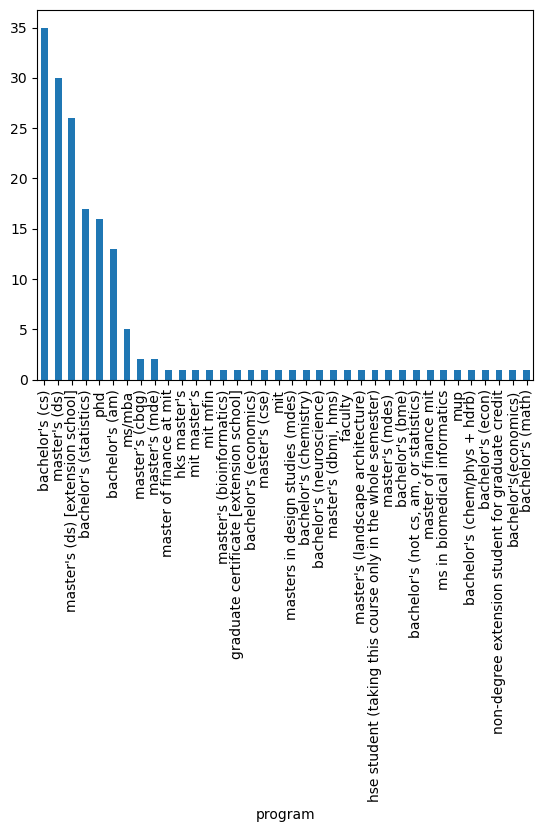

In [36]:
df.program.value_counts().plot(kind='bar')

Can we do something similar for `python_experience` and `pandas_skill`, but this time the proportion rather than count?

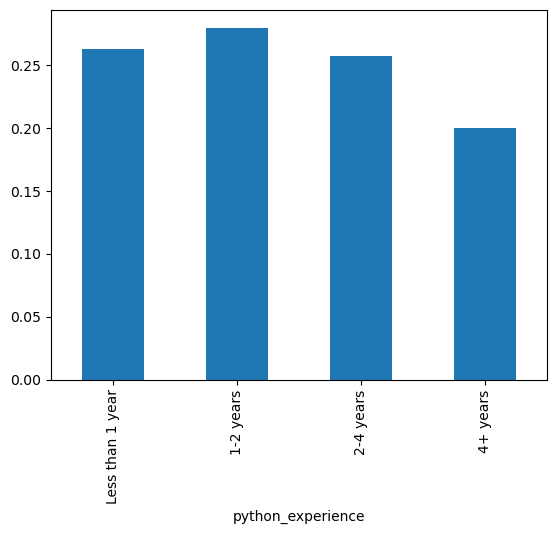

In [37]:
df.python_experience.value_counts(sort=False).divide(df.shape[0]).plot(kind='bar');

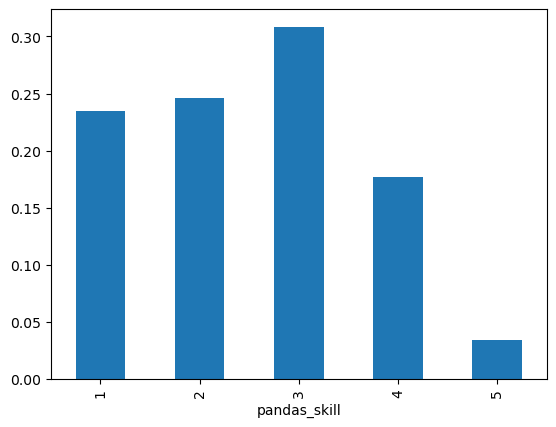

In [38]:
df.pandas_skill.sort_values().value_counts(sort=False).divide(df.shape[0]).plot(kind='bar');

What are all the languages CS1090A students speak?

In [39]:
df = df.dropna(subset='languages')

In [40]:
# snip
df.languages.str.split(', ').explode().replace(r'.*mandarin.*|madarin|(chinese$)', 'chinese (mandarin)', regex=True).unique().tolist()

['english',
 'spanish',
 'greek',
 'python r sql',
 'chinese (mandarin)',
 'korean',
 'ukrainian',
 'russian',
 'english,thai',
 'latin',
 'tamil',
 'cantonese',
 'arabic',
 'french',
 'hindi',
 'italian',
 'chinese english',
 'filipino',
 'malay',
 'thai',
 'english,chinese (mandarin)',
 'portuguese',
 'chinese/taiwanese',
 'bengali',
 'german',
 'dutch',
 'danish',
 'croatian',
 'bosnian',
 'serbian',
 'montenegrin',
 'chinese，english',
 'chinese ',
 'persian',
 'krio',
 'swahili',
 'basic french',
 'japanese',
 'english ',
 'spanish and english',
 'elvish',
 'farsi',
 'turkish',
 '',
 'python,sql',
 'vbs',
 'marathi',
 'malayalam',
 'bulgarian',
 'idk',
 'tagalog',
 'akan',
 'quechua',
 'bangla',
 'czech',
 'ndebele',
 'igbo',
 'hausa',
 'yoruba',
 'basque',
 'gujarati',
 'vietnamese',
 'armenian',
 'romanian',
 'kannada',
 'indonesian',
 'telugu']

**What is the greatest number of languages spoken by a CS109A student?**

In [41]:
df.languages.str.split(', ').apply(len).max()

np.int64(5)

**What is the average number of languages spoken by students in programs with at least 2 representatives?**(ideally, sorted)

In [42]:
df.loc[:,'num_languages'] = df.languages.str.split(', ').apply(len)

### Data Aggregation and Grouping

- `groupby()`
- `agg()`
- Aggregation functions like `mean()`, `count()`, `sum()`.

We first need to find which are the big programs to filter the df.

In [43]:
# snip
program_counts = df.program.value_counts()
big_programs = program_counts[program_counts >= 2].index
df[df.program.isin(big_programs)].groupby('program')['num_languages'].mean().sort_values()

program
master's (mde)                      1.500000
master's (ds)                       1.896552
bachelor's (cs)                     1.971429
master’s (cbqg)                     2.000000
phd                                 2.125000
bachelor's (statistics)             2.176471
ms/mba                              2.200000
master's (ds) [extension school]    2.230769
bachelor's (am)                     2.583333
Name: num_languages, dtype: float64

Does dark mode preference vary by operating system?

`pd.crosstab` helps here.

In [44]:
# snip
dark_mode_os_crosstab = pd.crosstab(df['os'], df['dark_mode'])
dark_mode_os_crosstab

dark_mode,False,True
os,,
I use Google colab,1,0
Linux,0,7
MacOS,46,74
"Use WSL at work, macOS at home so I suppose all three?",1,0
Windows,8,34
wsl,0,1


What the distribution of student ages?

In [45]:
# snip
# Just make sure dob is a datetime (invalid -> nat)
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# Compute age in years (floor). Result is nullable integer (Int64).
now = pd.Timestamp.now()
age_years = np.floor((now - df["dob"]).dt.days / 365.25).astype("Int64")

df.loc[:, "age"] = age_years
df.age

0      20
1      20
3      20
4      21
5      22
       ..
170    22
171    34
172    22
173    24
174    49
Name: age, Length: 172, dtype: Int64

In [46]:
df[df.isna().sum(axis=1)>0]
df.loc[:,'age'] = (pd.Timestamp.now() - df.dob).dt.days.divide(365.25)//1
df.age

0      20
1      20
3      20
4      21
5      22
       ..
170    22
171    34
172    22
173    24
174    49
Name: age, Length: 172, dtype: Int64

Some stats..

In [47]:
df.describe()

,pandas_skill,dob,num_languages,age
count,172.000000,164,172.000000,164.0
mean,2.534884,2000-01-28 03:30:43.902439040,2.075581,25.115854
min,1.000000,1966-09-10 00:00:00,1.000000,18.0
25%,2.000000,1999-08-15 00:00:00,1.000000,20.0
50%,3.000000,2003-02-05 00:00:00,2.000000,22.0
75%,3.000000,2004-09-23 00:00:00,3.000000,25.25
max,5.000000,2006-11-17 00:00:00,5.000000,59.0
std,1.115522,NaN,0.911324,8.048472


And a plot!

<Axes: >

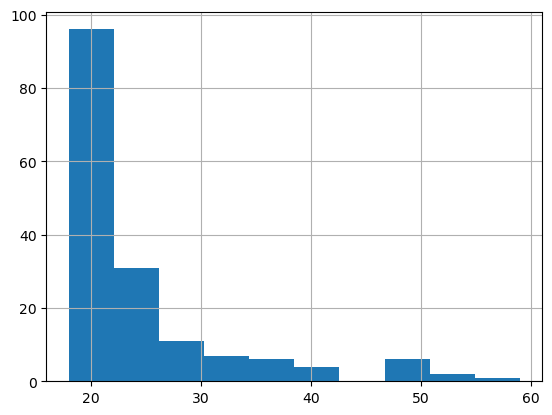

In [48]:
df.age.hist()

In [49]:
# born yesterday?
df[df.age < 10]

,program,jupyter,python_exp,pandas_skill,os,dark_mode,languages,continents,dob,wake_time,...,fav_season,caffeine,pet,fav_movie,fav_genres,hobbies,hw0,python_experience,num_languages,age


**Bar plot of mean Pandas skill by OS type**

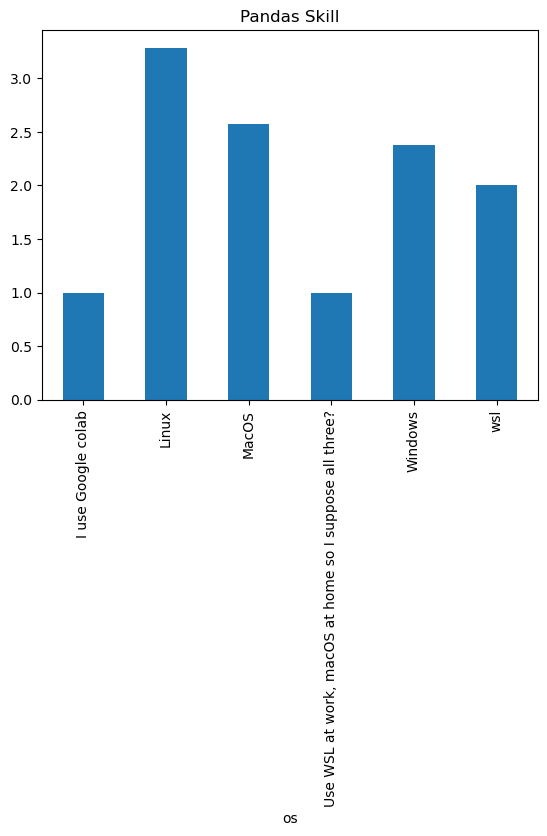

In [50]:
# snip
df.groupby('os', observed=False)['pandas_skill'].mean().plot(kind='bar', title = 'Pandas Skill');

What about something related to the HW0 emoji valued column?

In [51]:
df.hw0.unique()

array([nan, '🧐', '😅', '😎', '😱'], dtype=object)

In [52]:
# snip
emoji_order = pd.CategoricalDtype(categories=['🍰', '😎', '🧐', '😅', '😱', '☠️'], ordered=True)

df['hw0'] = df['hw0'].astype(emoji_order)

emoji_counts = df.groupby(['python_experience', 'hw0'], observed=False).size().unstack(fill_value=0)

emoji_proportions = emoji_counts.div(emoji_counts.sum(axis=1), axis=0)

emoji_proportions

hw0,🍰,😎,🧐,😅,😱,☠️
python_experience,,,,,,
Less than 1 year,0.0,0.000000,0.333333,0.333333,0.333333,0.0
1-2 years,0.0,0.500000,0.500000,0.000000,0.000000,0.0
2-4 years,0.0,0.600000,0.200000,0.200000,0.000000,0.0
4+ years,0.0,0.333333,0.666667,0.000000,0.000000,0.0


### Writing to Files

#### You can save your cleaned dataset to a new CSV file
- `to_csv()`
- `index` argument

In [53]:
df.to_csv('survey_final.csv', index=False)

🌈 **The End**